In [1]:
import sys
sys.path.insert(0, '../Main')#set the library path as sys path
import model

C:\Users\Zed_Luz\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
OnlineData = model.DATA(ReadALLSubjs=False,SplitData=True)

In [3]:
OnlineData.scandata(Subj=[1])
OnlineData.stackdata(ChooseSensors=['IMU'])

Scaning the AB185 subject is done.
30 channels of ['IMU'] data are selected:
Start stacking data...(Split data into train set and val set), and split ratio is  0.33
Finish stacking data of the 1 subjects: 52 trails
Done stacking data! 
Train dataset: (806884, 30) 
Val dataset: (389554, 30)


In [4]:
OnlineData.displayConfig()


Configuration:
CHOOSEDCHANNELS                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
DATAPATH                       C:\Users\Zed_Luz\OneDrive - 南方科技大学\BigScaleFiles\1-datasets for bilateral lower limb neuromechanical signals\2-Data
DataType                       ['Features', 'MVC', 'Processed', 'Raw']
INDEX_EMG                      [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43]
INDEX_GONIO                    [44, 45, 46, 47, 48, 49, 50, 51]
INDEX_IMU                      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
IfReadAll                      False
IfSplitData                    True
LABELCATEGORIES                ['Sitting', 'Level Ground Walking', 'Ramp Ascent', 'Ramp Descent', 'Stair Ascent', 'Stair Descent', 'Standing']
LEARNING_RATE                  0.001
MAXABS_PREPROCESS              False
SCANEDSubjects                 [1]
SPILT

In [5]:
OnlineData.PreprocessData(Preprocess='MinMax')

The preprocess method is MinMax
.
..
...
Preprocess is done


Illustate  30 channels of data...


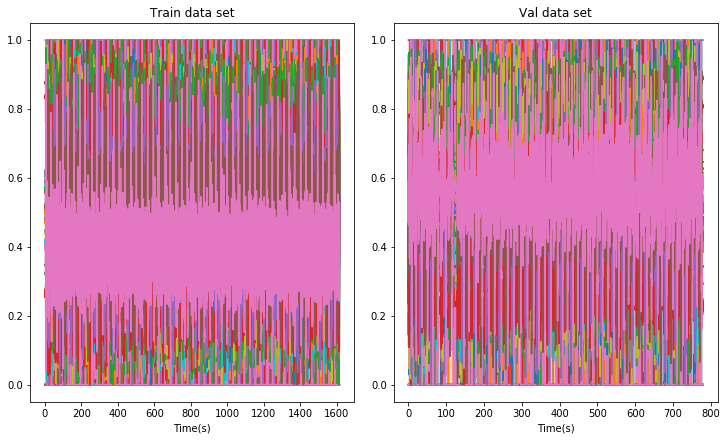

In [65]:
OnlineData.displaydata()

In [6]:
OnlineData.PrepareRNNdataset()

The dataset for RNN is prepared 
whose shape of train set is (80688, 100, 30) 
whose shape of val set is (38955, 100, 30)


## 1st RNN LSTM Model

In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model_rnn = Sequential()
model_rnn.add(LSTM(24, input_shape=(None,OnlineData.TRAIN_DATA_all.shape[2]),
                   return_sequences=True))
model_rnn.add(LSTM(12,return_sequences=False))
model_rnn.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],activation='softmax'))
model_rnn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 24)          5280      
_________________________________________________________________
lstm_2 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 91        
Total params: 7,147
Trainable params: 7,147
Non-trainable params: 0
_________________________________________________________________


## Train results without preprocess 

In [42]:
history = model_rnn.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=1,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))

Train on 80688 samples, validate on 38955 samples
Epoch 1/1
80688/80688 [==============================] - 236s 3ms/step - loss: 0.0630 - acc: 0.6822 - val_loss: 0.1154 - val_acc: 0.4250


## Train results with preprocess(better)

In [8]:
history = model_rnn.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=1,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))

Train on 80688 samples, validate on 38955 samples
Epoch 1/1
80688/80688 [==============================] - 273s 3ms/step - loss: 0.1063 - acc: 0.4321 - val_loss: 0.0995 - val_acc: 0.4917


## Prepare dataset with preprocess

##  Train result with preprocess

In [50]:
history2 = model_rnn.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=10,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))

Train on 80688 samples, validate on 38955 samples
Epoch 1/10
80688/80688 [==============================] - 235s 3ms/step - loss: 0.0785 - acc: 0.5840 - val_loss: 0.1029 - val_acc: 0.5521
Epoch 2/10
80688/80688 [==============================] - 243s 3ms/step - loss: 0.0651 - acc: 0.6437 - val_loss: 0.1003 - val_acc: 0.5470
Epoch 3/10
80688/80688 [==============================] - 238s 3ms/step - loss: 0.0540 - acc: 0.7179 - val_loss: 0.1104 - val_acc: 0.5448
Epoch 4/10
80688/80688 [==============================] - 233s 3ms/step - loss: 0.0378 - acc: 0.8222 - val_loss: 0.1069 - val_acc: 0.5765
Epoch 5/10
80688/80688 [==============================] - 243s 3ms/step - loss: 0.0257 - acc: 0.8858 - val_loss: 0.1049 - val_acc: 0.5921
Epoch 6/10
80688/80688 [==============================] - 248s 3ms/step - loss: 0.0195 - acc: 0.9145 - val_loss: 0.1094 - val_acc: 0.5863
Epoch 7/10
80688/80688 [==============================] - 235s 3ms/step - loss: 0.0164 - acc: 0.9289 - val_loss: 0.1090 - 

## 1st RNN model Overfitting!

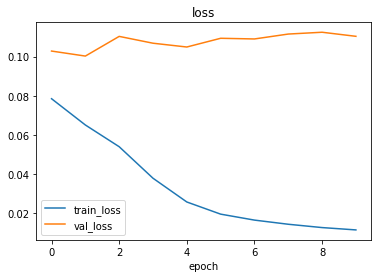

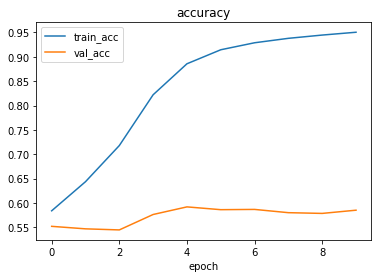

In [55]:
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'],label='val_loss')
plt.title('loss')
plt.legend()
plt.xlabel('epoch')
plt.show()
plt.plot(history2.history['acc'], label='train_acc')
plt.plot(history2.history['val_acc'],label='val_acc')
plt.title('accuracy')
plt.legend()
plt.xlabel('epoch')
plt.show()

## Store 1st model architecture, weight and optimizer state.

In [57]:
model_rnn.save('../ModelLogs/RNN-10Epochs-LSTM(24)+LSTM(12).h5')

## 2nd RNN model with 0.25 dropout

In [9]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
model_rnn2 = Sequential()
model_rnn2.add(LSTM(24, input_shape=(None,OnlineData.TRAIN_DATA_all.shape[2]),
                   return_sequences=True,dropout=0.25))
model_rnn2.add(LSTM(12,return_sequences=False,dropout=0.25))
model_rnn2.add(Dense(OnlineData.TRAIN_LABEL_all.shape[1],activation='softmax'))
model_rnn2.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model_rnn2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, None, 24)          5280      
_________________________________________________________________
lstm_4 (LSTM)                (None, 12)                1776      
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 91        
Total params: 7,147
Trainable params: 7,147
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model_rnn2.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=1,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))

Train on 80688 samples, validate on 38955 samples
Epoch 1/1
80688/80688 [==============================] - 273s 3ms/step - loss: 0.0974 - acc: 0.4941 - val_loss: 0.1017 - val_acc: 0.4863


## Train results with preprocess(better)

In [12]:
history = model_rnn2.fit(OnlineData.TRAIN_DATA_all,OnlineData.TRAIN_LABEL_all,epochs=1,
                        validation_data=(OnlineData.VAL_DATA_all,OnlineData.VAL_LABEL_all))

Train on 80688 samples, validate on 38955 samples
Epoch 1/1
80688/80688 [==============================] - 251s 3ms/step - loss: 0.0903 - acc: 0.5369 - val_loss: 0.1008 - val_acc: 0.4843
